In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

총 데이터 개수: 330087
Index(['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank',
       'weeks-on-board'],
      dtype='object')
2010~2023 데이터: 61900
    year  total  kpop  kpop_ratio(%)
0   2010   5200    28       0.538462
1   2011   5300     4       0.075472
2   2012   5200    15       0.288462
3   2013   5200    31       0.596154
4   2014   5200     1       0.019231
5   2015   5200     1       0.019231
6   2016   5300     2       0.037736
7   2017   5200    10       0.192308
8   2018   5200    29       0.557692
9   2019   5200    24       0.461538
10  2020   5200   117       2.250000
11  2021   4500   146       3.244444


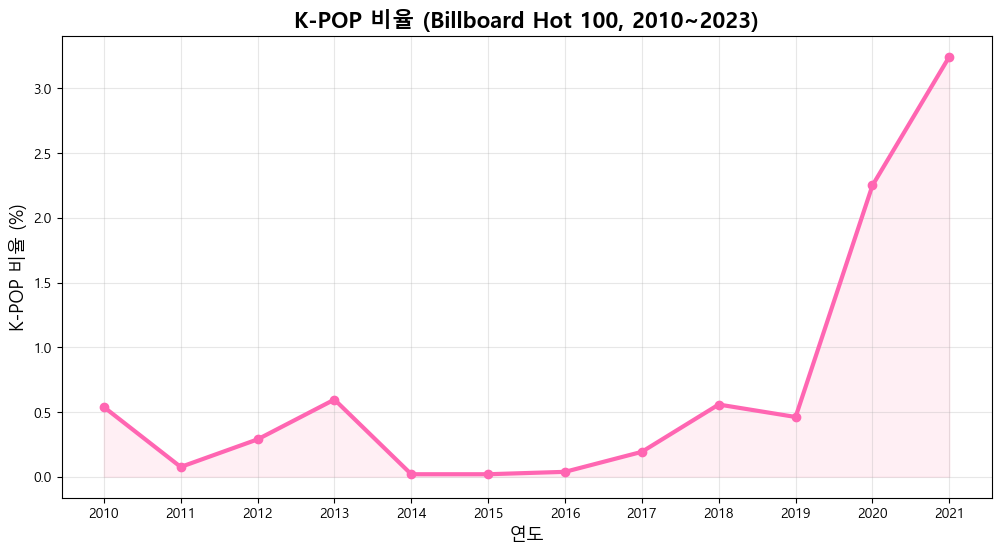


🔹 최근 5개년 요약:
    year  total  kpop  kpop_ratio(%)
7   2017   5200    10       0.192308
8   2018   5200    29       0.557692
9   2019   5200    24       0.461538
10  2020   5200   117       2.250000
11  2021   4500   146       3.244444


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1️⃣ 데이터 로드 =====
# (이미 df 불러왔다면 이 부분은 생략 가능)
df = pd.read_csv(r"C:\Users\smhrd\.cache\kagglehub\datasets\dhruvildave\billboard-the-hot-100-songs\versions\11\charts.csv")

print("총 데이터 개수:", len(df))
print(df.columns)

# ===== 2️⃣ 기본 전처리 =====
# 날짜 형식 정리
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# 분석 범위 (2010~2023)
df = df[df['year'].between(2010, 2023)]
print("2010~2023 데이터:", len(df))

# ===== 3️⃣ K-POP 아티스트 리스트 =====
kpop_artists = [
    "PSY", "BTS", "BLACKPINK", "TWICE", "SEVENTEEN", "EXO", "BIGBANG", "TXT",
    "STRAY KIDS", "NEWJEANS", "LE SSERAFIM", "IVE", "ENHYPEN", "(G)I-DLE",
    "AESPA", "NCT", "RED VELVET", "2NE1", "ILLIT", "ZEROBASEONE",
    "BOA", "JENNIE", "LISA", "ROSÉ", "JISOO", "GIRLS' GENERATION", "SNSD", "SHINEE"
]

# ===== 4️⃣ 대문자 변환 후 매칭 =====
df['artist_upper'] = df['artist'].str.upper()
df['is_kpop'] = df['artist_upper'].apply(lambda x: any(k in x for k in kpop_artists))

# ===== 5️⃣ 연도별 통계 =====
summary = (
    df.groupby('year')
      .agg(total=('song', 'count'), kpop=('is_kpop', 'sum'))
      .reset_index()
)
summary['kpop_ratio(%)'] = (summary['kpop'] / summary['total']) * 100

print(summary)

# ===== 6️⃣ 그래프 시각화 =====
plt.figure(figsize=(12,6))
plt.plot(summary['year'], summary['kpop_ratio(%)'], marker='o', color='#FF66B2', linewidth=3)
plt.fill_between(summary['year'], summary['kpop_ratio(%)'], color='#FFCCDD', alpha=0.3)
plt.title("K-POP 비율 (Billboard Hot 100, 2010~2023)", fontsize=16, weight='bold')
plt.xlabel("연도", fontsize=13)
plt.ylabel("K-POP 비율 (%)", fontsize=13)
plt.grid(True, alpha=0.3)
plt.xticks(summary['year'])
plt.show()

# ===== 7️⃣ 최신 연도별 데이터 미리보기 =====
print("\n🔹 최근 5개년 요약:")
print(summary.tail(5))